In [46]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import sklearn
import os

In [31]:
# Read data
#path = os.getcwd()
#print(path)
datafolder="/home/nbuser/ai101/COVID-19-ourworldindata"
dd = pd.read_csv(datafolder + "/covid-daily-deaths-per1m.csv")
# dd
ds = pd.read_csv(datafolder + "/covid-stringency-index.csv")
# ds

In [32]:
print(dd.dtypes)
print("---")
print(ds.dtypes)

Entity                                                                                 object
Code                                                                                   object
Date                                                                                   object
Daily new confirmed deaths due to COVID-19 per million people (deaths per million)    float64
dtype: object
---
Entity                                                                 object
Code                                                                   object
Date                                                                   object
Government Response Stringency Index ((0 to 100, 100 = strictest))    float64
dtype: object


In [33]:
print("\n-dd-\n",
dd.index,"\n",
dd.columns,"\n-ds-\n",
ds.index,"\n",
ds.columns
)


-dd-
 RangeIndex(start=0, stop=35308, step=1) 
 Index(['Entity', 'Code', 'Date',
       'Daily new confirmed deaths due to COVID-19 per million people (deaths per million)'],
      dtype='object') 
-ds-
 RangeIndex(start=0, stop=38343, step=1) 
 Index(['Entity', 'Code', 'Date',
       'Government Response Stringency Index ((0 to 100, 100 = strictest))'],
      dtype='object')


In [43]:
# print one country only
country="Canada"
def getonecountry(mydata,mycountry):
    return mydata[mydata['Entity'].isin([mycountry])]
cs=getonecountry(ds,country)
cd=getonecountry(dd,country)
#cs.head()

In [47]:
cs.loc[:,['Date','Government Response Stringency Index ((0 to 100, 100 = strictest))']]

,Date,"Government Response Stringency Index ((0 to 100, 100 = strictest))"
6310,"Jan 1, 2020",0.00
6311,"Jan 2, 2020",0.00
6312,"Jan 3, 2020",0.00
6313,"Jan 4, 2020",0.00
6314,"Jan 5, 2020",0.00
6315,"Jan 6, 2020",0.00
6316,"Jan 7, 2020",0.00
6317,"Jan 8, 2020",0.00
6318,"Jan 9, 2020",0.00
6319,"Jan 10, 2020",0.00


In [48]:
cd

,Entity,Code,Date,Daily new confirmed deaths due to COVID-19 per million people (deaths per million)
5871,Canada,CAN,31-Dec-19,0.000
5872,Canada,CAN,1-Jan-20,0.000
5873,Canada,CAN,2-Jan-20,0.000
5874,Canada,CAN,3-Jan-20,0.000
5875,Canada,CAN,4-Jan-20,0.000
5876,Canada,CAN,5-Jan-20,0.000
5877,Canada,CAN,6-Jan-20,0.000
5878,Canada,CAN,7-Jan-20,0.000
5879,Canada,CAN,8-Jan-20,0.000
5880,Canada,CAN,9-Jan-20,0.000


<Figure size 432x288 with 0 Axes>

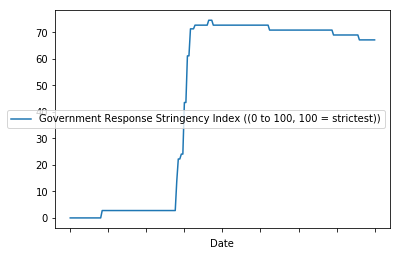

In [42]:
plt.figure()
c1.plot(x='Date',y='Government Response Stringency Index ((0 to 100, 100 = strictest))')

<Figure size 432x288 with 0 Axes>

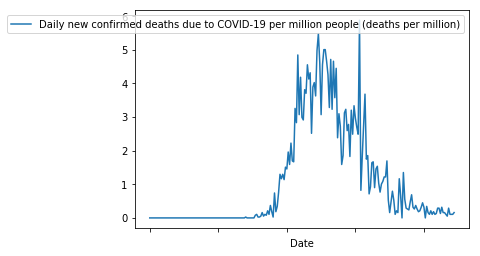

In [50]:
plt.figure()
cd.plot(x='Date',y='Daily new confirmed deaths due to COVID-19 per million people (deaths per million)')

In [55]:
def plot_mydata(mydataframe, colx,coly):
  # Process dataset
  mydataframe[colx] = pd.to_datetime(mydataframe[colx])
  #mydataframe[coly] = pd.to_numeric(mydataframe[coly])

  # Plot
  plt.figure()
  #plt.plot(mydataframe[colx], mydataframe[coly])
  mydataframe.plot(x=colx,y=coly)
  ax = plt.gca()
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
  plt.gcf().autofmt_xdate() # Rotation
  plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

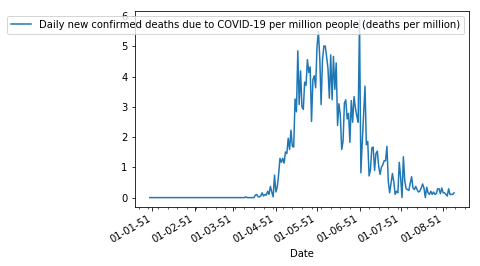

In [56]:
plot_mydata(cd,'Date','Daily new confirmed deaths due to COVID-19 per million people (deaths per million)')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

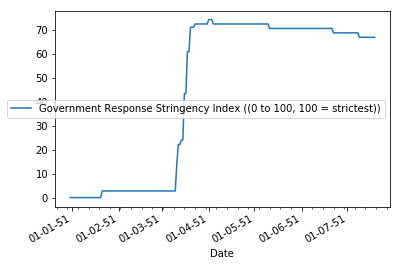

In [58]:
plot_mydata(cs,'Date','Government Response Stringency Index ((0 to 100, 100 = strictest))')